In [34]:
import os
import numpy as np
from keras.preprocessing import image
import cv2
import warnings
import random
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [35]:


def get_XY():
    categories = ['with_mask', 'without_mask']
    dataset = []

    for category in categories:
        path = os.path.join('data', category)
        label = categories.index(category)
        file_list = os.listdir(path)
        random.shuffle(file_list)  # Shuffle the file list

        count = 0  # Track the number of selected photos
        for file in file_list:
            if count >= 1200:
                break  # Stop iterating if we have reached the desired count

            img_path = os.path.join(path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))

            dataset.append([img, label])
            count += 1

    random.shuffle(dataset)

    X = []
    Y = []

    for features, label in dataset:
        X.append(features)
        Y.append(label)

    X = np.array(X)
    X = X / 255  # scaling the X
    Y = np.array(Y)

    return X, Y

In [36]:
X,Y = get_XY()

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(2400, 224, 224, 3) (1920, 224, 224, 3) (480, 224, 224, 3)


In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [41]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [42]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=7)
model.save('Trained_model.h5')

Epoch 1/7
54/54 [==============================] - 73s 1s/step - loss: 0.8830 - acc: 0.6661 - val_loss: 0.4106 - val_acc: 0.8229
Epoch 2/7
54/54 [==============================] - 67s 1s/step - loss: 0.4500 - acc: 0.8171 - val_loss: 0.5531 - val_acc: 0.7865
Epoch 3/7
54/54 [==============================] - 67s 1s/step - loss: 0.3743 - acc: 0.8519 - val_loss: 0.3378 - val_acc: 0.8490
Epoch 4/7
54/54 [==============================] - 66s 1s/step - loss: 0.3195 - acc: 0.8808 - val_loss: 0.3053 - val_acc: 0.8802
Epoch 5/7
54/54 [==============================] - 66s 1s/step - loss: 0.2629 - acc: 0.9016 - val_loss: 0.2878 - val_acc: 0.8750
Epoch 6/7
54/54 [==============================] - 66s 1s/step - loss: 0.2614 - acc: 0.9086 - val_loss: 0.3255 - val_acc: 0.8750
Epoch 7/7
54/54 [==============================] - 64s 1s/step - loss: 0.2173 - acc: 0.9213 - val_loss: 0.3445 - val_acc: 0.8646


In [43]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy*100,'%')

15/15 [==============================] - 3s 210ms/step - loss: 0.3602 - acc: 0.8583
Test Accuracy = 85.83333492279053 %


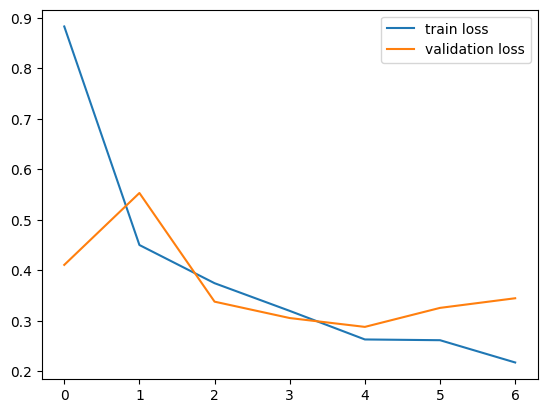

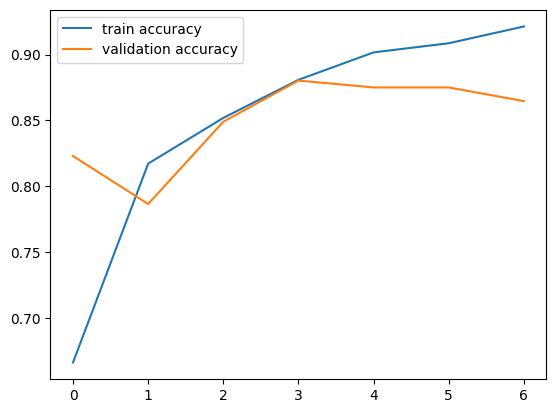

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 103ms/step


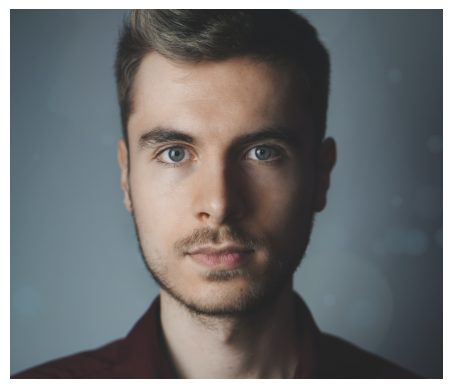

The person in the image is not wearing a mask


In [54]:

def predict_mask(input_image_path, model):
    input_image = cv2.imread(input_image_path)
    input_image_resized = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    if input_pred_label == 0:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')

# Usage example
input_image_path = input('Path of the image to be predicted: ')
model_path = 'D:\Face_mask_detect\Trained_model.h5'  # Replace with the actual path to your trained model

model = tf.keras.models.load_model(model_path)

predict_mask(input_image_path, model)

In [1]:
import cv2
import numpy as np
import tensorflow as tf

# Load the pre-trained model
model_path = 'D:\Face_mask_detect\Trained_model.h5'  # Replace with the actual path to your trained model
model = tf.keras.models.load_model(model_path)

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to perform mask prediction on the image
def predict_mask(image):
    # Resize and preprocess the image
    input_image_resized = cv2.resize(image, (224, 224))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Perform mask prediction
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 0:
        return 'Mask Detected'
    else:
        return 'No Mask Detected'

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Failed to open webcam.")
    exit()

# Create a pop-up window to display the webcam feed
cv2.namedWindow('Mask Detection')

# Process frames from the webcam feed
while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame from webcam.")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Find the largest face
    largest_face = None
    largest_area = 0

    for (x, y, w, h) in faces:
        area = w * h
        if area > largest_area:
            largest_area = area
            largest_face = (x, y, w, h)

    # Process the largest face
    if largest_face is not None:
        x, y, w, h = largest_face

        # Zoom in on the face by adjusting the region of interest (ROI)
        roi_x = x - int(0.2 * w)
        roi_y = y - int(0.2 * h)
        roi_w = int(1.4 * w)
        roi_h = int(1.4 * h)
        roi = frame[roi_y:roi_y + roi_h, roi_x:roi_x + roi_w]

        if roi.size != 0:  # Check if ROI is empty
            try:
                # Perform mask prediction on the ROI
                result = predict_mask(roi)

                # Draw bounding box and label on the face
                cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_w, roi_y + roi_h), (0, 255, 0), 2)
                cv2.putText(frame, result, (roi_x, roi_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            except Exception as e:
                print("Error during prediction:", str(e))

    # Display the frame in the pop-up window
    cv2.imshow('Mask Detection', frame)

    # Break the loop when 'x' is pressed
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

# Release the resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 35ms/step
